In [11]:
import pandas as pd
import numpy as np
from csv import reader
# read csv file as a list of lists
with open('q_idec_data3.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Pass reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)


#print(type(list_of_rows))
#print((list_of_rows))

list_of_floats = []
for item in list_of_rows:
    norm = [float(i) for i in item]
    list_of_floats.append(norm)
list_of_floats
#print((list_of_floats))
df_q = pd.DataFrame(list_of_floats, columns=['0','1','2','3'])
df_q = df_q[['2', '3', '1', '0']]
df_q


,2,3,1,0
0,0.019317,0.038873,0.908903,0.032906
1,0.045135,0.887660,0.038575,0.028629
2,0.043871,0.891338,0.037160,0.027631
3,0.101844,0.036338,0.036772,0.825046
4,0.103907,0.036498,0.036489,0.823107
...,...,...,...,...
4825,0.018736,0.037727,0.911602,0.031935
4826,0.018441,0.036392,0.913502,0.031665
4827,0.020732,0.042641,0.902059,0.034568
4828,0.865950,0.042919,0.018462,0.072669


,0,1,2,3
0,0.250024,0.249976,0.250005,0.249995
1,0.249980,0.249906,0.250065,0.250049
2,0.250021,0.249865,0.250029,0.250084
3,0.249959,0.250032,0.250047,0.249961
4,0.249978,0.249954,0.250058,0.250010
...,...,...,...,...
45686,0.250102,0.249870,0.249971,0.250057
45687,0.249948,0.250040,0.250046,0.249966
45688,0.249991,0.249932,0.250057,0.250019
45689,0.250010,0.250025,0.250033,0.249932


In [112]:
df_q['dec_soft'] = df_q[['2', '3', '1', '0']].values.tolist()
df_q = df_q.drop(['2', '3', '1', '0'], axis=1)
df_q

,dec_soft
0,"[0.019317355006933212, 0.038872990757226944, 0..."
1,"[0.045134883373975754, 0.8876604437828064, 0.0..."
2,"[0.04387052729725838, 0.8913384079933167, 0.03..."
3,"[0.10184371471405029, 0.03633798658847809, 0.0..."
4,"[0.10390670597553253, 0.036497555673122406, 0...."
...,...
4825,"[0.018736086785793304, 0.037726886570453644, 0..."
4826,"[0.018440620973706245, 0.03639218956232071, 0...."
4827,"[0.020732177421450615, 0.04264090210199356, 0...."
4828,"[0.8659502267837524, 0.042918860912323, 0.0184..."


In [113]:

#data = pd.read_csv('merge_final1.csv')
data = pd.read_csv('data3.csv')
data.head()
data_x = data.drop(['index'], axis=1)
data_x['LOS'] = data_x['LOS'].apply(lambda x: '0' if x >= 0 and x<=4  else ('1' if x >= 5 and x<=7  else('2' if x >= 8 and x<=14 else '3')) )
data_x

df = data_x[['HADM_ID','LOS']]
hadm_list = df.groupby('HADM_ID')['LOS'].apply(list).reset_index()
hadm_item = pd.get_dummies(hadm_list['LOS'].apply(pd.Series).stack()).sum(level=0)
df_cat = hadm_item.join(hadm_list['HADM_ID'], how="outer")

df = data_x.merge(df_cat, how='outer', on='HADM_ID')

df

,HADM_ID,LOS,d_blood,d_circulatory,d_congenital,d_digestive,d_endocrine,d_genitourinary,d_ill-defined,d_infectious,...,AGE_young adult,Antibiotics,Fluids/Intake,Medications,Nutrition - Enteral,Nutrition - Supplements,0,1,2,3
0,124321,1,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0,3.0,33.0,14.0,0.0,0.0,0,1,0,0
1,101651,0,1.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0,4.0,16.0,6.0,2.0,0.0,1,0,0,0
2,117876,3,1.0,5.0,0.0,2.0,4.0,0.0,2.0,0.0,...,0,16.0,253.0,225.0,68.0,0.0,0,0,0,1
3,139061,0,2.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,...,1,1.0,27.0,22.0,0.0,0.0,1,0,0,0
4,172335,1,3.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,...,1,5.0,21.0,10.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,168288,2,0.0,1.0,0.0,0.0,1.0,3.0,0.0,3.0,...,0,5.0,55.0,30.0,0.0,0.0,0,0,1,0
4826,153703,2,2.0,3.0,0.0,0.0,1.0,3.0,1.0,2.0,...,0,54.0,209.0,162.0,0.0,0.0,0,0,1,0
4827,122488,1,0.0,7.0,0.0,1.0,2.0,2.0,0.0,0.0,...,0,3.0,78.0,72.0,0.0,0.0,0,1,0,0
4828,192767,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0,0.0,9.0,8.0,0.0,0.0,0,1,0,0


In [114]:
df['freq'] = df[['0','1', '2', '3']].values.tolist()
df = df.drop(['0','1', '2', '3'], axis=1)
n = []
for j in df.freq:
    norm = [float(i) for i in j]
    n.append(norm)
    
df['freq'] = n


In [115]:
mer =df.join(df_q, how = 'outer')
'''
for j in mer.freq:
    for i in range(len(j)):
        if j[i]==0:
            j[i]=0.0000001


'''
#mer.to_csv('mer.csv',index=False)
mer

,HADM_ID,LOS,d_blood,d_circulatory,d_congenital,d_digestive,d_endocrine,d_genitourinary,d_ill-defined,d_infectious,...,AGE_middle_adult,AGE_senior,AGE_young adult,Antibiotics,Fluids/Intake,Medications,Nutrition - Enteral,Nutrition - Supplements,freq,dec_soft
0,124321,1,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0,1,0,3.0,33.0,14.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.019317355006933212, 0.038872990757226944, 0..."
1,101651,0,1.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0,1,0,4.0,16.0,6.0,2.0,0.0,"[1.0, 0.0, 0.0, 0.0]","[0.045134883373975754, 0.8876604437828064, 0.0..."
2,117876,3,1.0,5.0,0.0,2.0,4.0,0.0,2.0,0.0,...,0,1,0,16.0,253.0,225.0,68.0,0.0,"[0.0, 0.0, 0.0, 1.0]","[0.04387052729725838, 0.8913384079933167, 0.03..."
3,139061,0,2.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,...,0,0,1,1.0,27.0,22.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0]","[0.10184371471405029, 0.03633798658847809, 0.0..."
4,172335,1,3.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,...,0,0,1,5.0,21.0,10.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.10390670597553253, 0.036497555673122406, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,168288,2,0.0,1.0,0.0,0.0,1.0,3.0,0.0,3.0,...,0,1,0,5.0,55.0,30.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0]","[0.018736086785793304, 0.037726886570453644, 0..."
4826,153703,2,2.0,3.0,0.0,0.0,1.0,3.0,1.0,2.0,...,0,1,0,54.0,209.0,162.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0]","[0.018440620973706245, 0.03639218956232071, 0...."
4827,122488,1,0.0,7.0,0.0,1.0,2.0,2.0,0.0,0.0,...,0,1,0,3.0,78.0,72.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.020732177421450615, 0.04264090210199356, 0...."
4828,192767,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1,0,0,0.0,9.0,8.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.8659502267837524, 0.042918860912323, 0.0184..."


In [110]:
import numpy as np
#print(merged['con_list'][0])
def KL(a,b):
    #print(type(a))
    #print(type(b))
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

#print(merged['con_list'].shape)
#print(merged['norm'].shape)
kl=[]
#df_norm['soft_prob'].toarray()
#df_norm['norm'].toarray()
for i in range(mer['dec_soft'].shape[0]):
    kl_div = KL(mer['dec_soft'][i], mer['freq'][i])
    #print(kl_div)
    kl.append(kl_div)
    

df_kl = pd.DataFrame(kl, columns=['kl'])

def Average(lst): 
    return sum(lst) / len(lst) 
  
average = Average(kl) 
print('average_kl:', average)

average_kl: 10.97389389289564


In [116]:
#import pandas as pd
#import numpy as np
#mer = pd.read_csv('mer.csv')
pos = [1,2,4,8]
#[1 0 0 0] [1,2,4,8]
#[0 1 0 0] [4,1,2,8]
#[0 0 1 0] [8,4,1,2]
#[0 0 0 1] [8 4 2 1]
err = np.zeros((mer.freq).size)
k = 0
for j in range((mer.freq).size):
    
    i = 0
    if mer.freq[j][i] == 1.0 and mer.freq[j][i+1] == 0.0 and mer.freq[j][i+2] == 0.0 and mer.freq[j][i+3] == 0.0:
        err[k] = ((mer.freq[j][i] - mer.dec_soft[j][i])**2)*1 + ((mer.freq[j][i+1] - mer.dec_soft[j][i+1])**2)*2 + \
                ((mer.freq[j][i+2] - mer.dec_soft[j][i+2])**2)*4 + ((mer.freq[j][i+3] - mer.dec_soft[j][i+3])**2)*8
       
    elif mer.freq[j][i] == 0.0 and mer.freq[j][i+1] == 1.0 and mer.freq[j][i+2] == 0.0 and mer.freq[j][i+3] == 0.0:
        err[k] = ((mer.freq[j][i] - mer.dec_soft[j][i])**2)*4 + ((mer.freq[j][i+1] - mer.dec_soft[j][i+1])**2)*1 + \
                ((mer.freq[j][i+2] - mer.dec_soft[j][i+2])**2)*2 + ((mer.freq[j][i+3] - mer.dec_soft[j][i+3])**2)*8
        
    elif mer.freq[j][i] == 0.0 and mer.freq[j][i+1] == 0.0 and mer.freq[j][i+2] == 1.0 and mer.freq[j][i+3] == 0.0:
        err[k]= ((mer.freq[j][i] - mer.dec_soft[j][i])**2)*8 + ((mer.freq[j][i+1] - mer.dec_soft[j][i+1])**2)*4 + \
                ((mer.freq[j][i+2] - mer.dec_soft[j][i+2])**2)*1 + ((mer.freq[j][i+3] - mer.dec_soft[j][i+3])**2)*2
        
    elif mer.freq[j][i] == 0.0 and mer.freq[j][i+1] == 0.0 and mer.freq[j][i+2] == 0.0 and mer.freq[j][i+3] == 1.0:
        err[k] = ((mer.freq[j][i] - mer.dec_soft[j][i])**2)*8 + ((mer.freq[j][i+1] - mer.dec_soft[j][i+1])**2)*4 + \
                ((mer.freq[j][i+2] - mer.dec_soft[j][i+2])**2)*2 + ((mer.freq[j][i+3] - mer.dec_soft[j][i+3])**2)*1

    k = k+1

df_err = pd.DataFrame(err, columns=['err_soft'])
      
print('mean error: ',np.mean(err))

            


mean error:  2.8309405433629515


In [117]:
err

array([2.58613122, 2.50015884, 4.14159718, ..., 2.55523716, 3.95841164,
       7.04326122])

In [118]:

err_kl =df_err.join(df_kl, how = 'outer')
mer =mer.join(err_kl, how = 'outer')
mer.to_csv('mer.csv',index=False)
mer

,HADM_ID,LOS,d_blood,d_circulatory,d_congenital,d_digestive,d_endocrine,d_genitourinary,d_ill-defined,d_infectious,...,AGE_young adult,Antibiotics,Fluids/Intake,Medications,Nutrition - Enteral,Nutrition - Supplements,freq,dec_soft,err_soft,kl
0,124321,1,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0,3.0,33.0,14.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.019317355006933212, 0.038872990757226944, 0...",2.586131,15.089899
1,101651,0,1.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0,4.0,16.0,6.0,2.0,0.0,"[1.0, 0.0, 0.0, 0.0]","[0.045134883373975754, 0.8876604437828064, 0.0...",2.500159,14.917698
2,117876,3,1.0,5.0,0.0,2.0,4.0,0.0,2.0,0.0,...,0,16.0,253.0,225.0,68.0,0.0,"[0.0, 0.0, 0.0, 1.0]","[0.04387052729725838, 0.8913384079933167, 0.03...",4.141597,15.211534
3,139061,0,2.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,...,1,1.0,27.0,22.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0]","[0.10184371471405029, 0.03633798658847809, 0.0...",6.260341,13.843340
4,172335,1,3.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,...,1,5.0,21.0,10.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.10390670597553253, 0.036497555673122406, 0....",6.394223,14.892687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,168288,2,0.0,1.0,0.0,0.0,1.0,3.0,0.0,3.0,...,0,5.0,55.0,30.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0]","[0.018736086785793304, 0.037726886570453644, 0...",0.018355,1.032285
4826,153703,2,2.0,3.0,0.0,0.0,1.0,3.0,1.0,2.0,...,0,54.0,209.0,162.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0]","[0.018440620973706245, 0.03639218956232071, 0....",0.017505,1.007990
4827,122488,1,0.0,7.0,0.0,1.0,2.0,2.0,0.0,0.0,...,0,3.0,78.0,72.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.020732177421450615, 0.04264090210199356, 0....",2.555237,15.006624
4828,192767,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0,0.0,9.0,8.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.8659502267837524, 0.042918860912323, 0.0184...",3.958412,14.902336


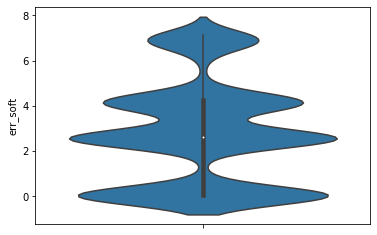

In [119]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
ax = sns.violinplot(y=mer["err_soft"])

In [3]:
#hard clustering err
import pandas as pd

import numpy as np
from csv import reader
# read csv file as a list of lists
with open('idecpred_data3.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Pass reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)
#df = pd.read_csv('q.csv',header=None,usecols=[0,1,2,3])
#df['list'] = df[['0','1', '2', '3']].values.tolist()

list_of_floats = []
for item in list_of_rows:
    norm = [float(i) for i in item]
    list_of_floats.append(norm)
print(list_of_floats)



df_qq = pd.DataFrame(list_of_floats, columns=['dec_pred'])
prefix_cols = ['dec']
dummy_cols = ['dec_pred']
df_qq = pd.get_dummies(df_qq, prefix=prefix_cols, columns=dummy_cols)
df_qq = df_qq[['dec_2.0','dec_3.0', 'dec_1.0', 'dec_0.0']]
df_qq

[[1.0], [3.0], [3.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [2.0], [0.0], [1.0], [3.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0], [3.0], [1.0], [2.0], [2.0], [2.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [3.0], [2.0], [2.0], [2.0], [2.0], [1.0], [1.0], [1.0], [2.0], [1.0], [1.0], [1.0], [1.0], [1.0], [2.0], [1.0], [3.0], [3.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [2.0], [2.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [2.0], [0.0], [0.0], [0.0], [0.0], [1.0], [2.0], [2.0], [0.0], [2.0], [0.0], [0.0], [2.0], [1.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [2.0], [0.0], [0.0], [2.0], [0.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [2.0], [2.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0]

,dec_2.0,dec_3.0,dec_1.0,dec_0.0
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
4825,0,0,1,0
4826,0,0,1,0
4827,0,0,1,0
4828,1,0,0,0


In [121]:
df_qq['dec_hard'] = df_qq[['dec_2.0','dec_3.0', 'dec_1.0', 'dec_0.0']].values.tolist()
df_qq = df_qq.drop(['dec_2.0','dec_3.0', 'dec_1.0', 'dec_0.0'], axis=1)
n = []
for j in df_qq.dec_hard:
    norm = [float(i) for i in j]
    n.append(norm)
    
df_qq['dec_hard'] = n

df_qq

,dec_hard
0,"[0.0, 0.0, 1.0, 0.0]"
1,"[0.0, 1.0, 0.0, 0.0]"
2,"[0.0, 1.0, 0.0, 0.0]"
3,"[0.0, 0.0, 0.0, 1.0]"
4,"[0.0, 0.0, 0.0, 1.0]"
...,...
4825,"[0.0, 0.0, 1.0, 0.0]"
4826,"[0.0, 0.0, 1.0, 0.0]"
4827,"[0.0, 0.0, 1.0, 0.0]"
4828,"[1.0, 0.0, 0.0, 0.0]"


In [122]:
merged =mer.join(df_qq, how = 'outer')

#merged.to_csv('mer.csv',index=False)
merged

,HADM_ID,LOS,d_blood,d_circulatory,d_congenital,d_digestive,d_endocrine,d_genitourinary,d_ill-defined,d_infectious,...,Antibiotics,Fluids/Intake,Medications,Nutrition - Enteral,Nutrition - Supplements,freq,dec_soft,err_soft,kl,dec_hard
0,124321,1,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,33.0,14.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.019317355006933212, 0.038872990757226944, 0...",2.586131,15.089899,"[0.0, 0.0, 1.0, 0.0]"
1,101651,0,1.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,...,4.0,16.0,6.0,2.0,0.0,"[1.0, 0.0, 0.0, 0.0]","[0.045134883373975754, 0.8876604437828064, 0.0...",2.500159,14.917698,"[0.0, 1.0, 0.0, 0.0]"
2,117876,3,1.0,5.0,0.0,2.0,4.0,0.0,2.0,0.0,...,16.0,253.0,225.0,68.0,0.0,"[0.0, 0.0, 0.0, 1.0]","[0.04387052729725838, 0.8913384079933167, 0.03...",4.141597,15.211534,"[0.0, 1.0, 0.0, 0.0]"
3,139061,0,2.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,...,1.0,27.0,22.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0]","[0.10184371471405029, 0.03633798658847809, 0.0...",6.260341,13.843340,"[0.0, 0.0, 0.0, 1.0]"
4,172335,1,3.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,...,5.0,21.0,10.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.10390670597553253, 0.036497555673122406, 0....",6.394223,14.892687,"[0.0, 0.0, 0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,168288,2,0.0,1.0,0.0,0.0,1.0,3.0,0.0,3.0,...,5.0,55.0,30.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0]","[0.018736086785793304, 0.037726886570453644, 0...",0.018355,1.032285,"[0.0, 0.0, 1.0, 0.0]"
4826,153703,2,2.0,3.0,0.0,0.0,1.0,3.0,1.0,2.0,...,54.0,209.0,162.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0]","[0.018440620973706245, 0.03639218956232071, 0....",0.017505,1.007990,"[0.0, 0.0, 1.0, 0.0]"
4827,122488,1,0.0,7.0,0.0,1.0,2.0,2.0,0.0,0.0,...,3.0,78.0,72.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.020732177421450615, 0.04264090210199356, 0....",2.555237,15.006624,"[0.0, 0.0, 1.0, 0.0]"
4828,192767,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,9.0,8.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.8659502267837524, 0.042918860912323, 0.0184...",3.958412,14.902336,"[1.0, 0.0, 0.0, 0.0]"


In [123]:

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics.cluster import normalized_mutual_info_score

nm = np.zeros((merged.freq).size)
k = 0
for j in range((merged.freq).size):
    nm[k] = normalized_mutual_info_score(merged.freq[j], merged.dec_hard[j])
    k = k+1
    
print(nm)
print('mean nmi: ',np.mean(nm))



[0.15106564 0.15106564 0.15106564 ... 0.15106564 0.15106564 0.15106564]
mean nmi:  0.40064882643490723


In [124]:
pos = [1,2,4,8]

err = np.zeros((merged.freq).size)
k = 0
for j in range((merged.freq).size):
    
    i = 0
    if merged.freq[j][i] == 1.0 and merged.freq[j][i+1] == 0.0 and merged.freq[j][i+2] == 0.0 and merged.freq[j][i+3] == 0.0:
        err[k] = ((merged.freq[j][i] - merged.dec_hard[j][i])**2)*1 + ((merged.freq[j][i+1] - merged.dec_hard[j][i+1])**2)*2 + \
                ((merged.freq[j][i+2] - merged.dec_hard[j][i+2])**2)*4 + ((merged.freq[j][i+3] - merged.dec_hard[j][i+3])**2)*8
       
    elif merged.freq[j][i] == 0.0 and merged.freq[j][i+1] == 1.0 and merged.freq[j][i+2] == 0.0 and merged.freq[j][i+3] == 0.0:
        err[k] = ((merged.freq[j][i] - merged.dec_hard[j][i])**2)*4 + ((merged.freq[j][i+1] - merged.dec_hard[j][i+1])**2)*1 + \
                ((merged.freq[j][i+2] - merged.dec_hard[j][i+2])**2)*2 + ((merged.freq[j][i+3] - merged.dec_hard[j][i+3])**2)*8
        
    elif merged.freq[j][i] == 0.0 and merged.freq[j][i+1] == 0.0 and merged.freq[j][i+2] == 1.0 and merged.freq[j][i+3] == 0.0:
        err[k]= ((merged.freq[j][i] - merged.dec_hard[j][i])**2)*8 + ((merged.freq[j][i+1] - merged.dec_hard[j][i+1])**2)*4 + \
                ((merged.freq[j][i+2] - merged.dec_hard[j][i+2])**2)*1 + ((merged.freq[j][i+3] - merged.dec_hard[j][i+3])**2)*2
        
    elif merged.freq[j][i] == 0.0 and merged.freq[j][i+1] == 0.0 and merged.freq[j][i+2] == 0.0 and merged.freq[j][i+3] == 1.0:
        err[k] = ((merged.freq[j][i] - merged.dec_hard[j][i])**2)*8 + ((merged.freq[j][i+1] - merged.dec_hard[j][i+1])**2)*4 + \
                ((merged.freq[j][i+2] - merged.dec_hard[j][i+2])**2)*2 + ((merged.freq[j][i+3] - merged.dec_hard[j][i+3])**2)*1

    k = k+1

df_err = pd.DataFrame(err, columns=['err_hard'])
      
print('mean error: ',np.mean(err))


mean error:  3.5668737060041407


In [125]:
merged =merged.join(df_err, how = 'outer')

#merged.to_csv('mer.csv',index=False)
merged

,HADM_ID,LOS,d_blood,d_circulatory,d_congenital,d_digestive,d_endocrine,d_genitourinary,d_ill-defined,d_infectious,...,Fluids/Intake,Medications,Nutrition - Enteral,Nutrition - Supplements,freq,dec_soft,err_soft,kl,dec_hard,err_hard
0,124321,1,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,33.0,14.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.019317355006933212, 0.038872990757226944, 0...",2.586131,15.089899,"[0.0, 0.0, 1.0, 0.0]",3.0
1,101651,0,1.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,...,16.0,6.0,2.0,0.0,"[1.0, 0.0, 0.0, 0.0]","[0.045134883373975754, 0.8876604437828064, 0.0...",2.500159,14.917698,"[0.0, 1.0, 0.0, 0.0]",3.0
2,117876,3,1.0,5.0,0.0,2.0,4.0,0.0,2.0,0.0,...,253.0,225.0,68.0,0.0,"[0.0, 0.0, 0.0, 1.0]","[0.04387052729725838, 0.8913384079933167, 0.03...",4.141597,15.211534,"[0.0, 1.0, 0.0, 0.0]",5.0
3,139061,0,2.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,...,27.0,22.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0]","[0.10184371471405029, 0.03633798658847809, 0.0...",6.260341,13.843340,"[0.0, 0.0, 0.0, 1.0]",9.0
4,172335,1,3.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,...,21.0,10.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.10390670597553253, 0.036497555673122406, 0....",6.394223,14.892687,"[0.0, 0.0, 0.0, 1.0]",9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,168288,2,0.0,1.0,0.0,0.0,1.0,3.0,0.0,3.0,...,55.0,30.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0]","[0.018736086785793304, 0.037726886570453644, 0...",0.018355,1.032285,"[0.0, 0.0, 1.0, 0.0]",0.0
4826,153703,2,2.0,3.0,0.0,0.0,1.0,3.0,1.0,2.0,...,209.0,162.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0]","[0.018440620973706245, 0.03639218956232071, 0....",0.017505,1.007990,"[0.0, 0.0, 1.0, 0.0]",0.0
4827,122488,1,0.0,7.0,0.0,1.0,2.0,2.0,0.0,0.0,...,78.0,72.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.020732177421450615, 0.04264090210199356, 0....",2.555237,15.006624,"[0.0, 0.0, 1.0, 0.0]",3.0
4828,192767,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,9.0,8.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.8659502267837524, 0.042918860912323, 0.0184...",3.958412,14.902336,"[1.0, 0.0, 0.0, 0.0]",5.0


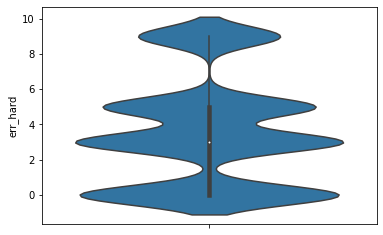

In [102]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
ax = sns.violinplot(y=merged["err_hard"])

In [59]:
import pandas as pd
import numpy as np
from csv import reader
# read csv file as a list of lists
with open('ikpred_data3.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Pass reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)
#df = pd.read_csv('q.csv',header=None,usecols=[0,1,2,3])
#df['list'] = df[['0','1', '2', '3']].values.tolist()

list_of_floats = []
for item in list_of_rows:
    norm = [float(i) for i in item]
    list_of_floats.append(norm)
list_of_floats



df_qq = pd.DataFrame(list_of_floats, columns=['dec_pred_km'])
prefix_cols = ['km']
dummy_cols = ['dec_pred_km']
df_qq = pd.get_dummies(df_qq, prefix=prefix_cols, columns=dummy_cols)
df_qq = df_qq[['km_2.0','km_1.0', 'km_3.0', 'km_0.0']]
df_qq


,km_2.0,km_1.0,km_3.0,km_0.0
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
4825,0,0,1,0
4826,0,0,1,0
4827,0,1,0,0
4828,0,0,0,1


In [60]:
df_qq['km_hard'] = df_qq[['km_2.0','km_1.0', 'km_3.0', 'km_0.0']].values.tolist()
df_qq = df_qq.drop(['km_2.0','km_1.0', 'km_3.0', 'km_0.0'], axis=1)
n = []
for j in df_qq.km_hard:
    norm = [float(i) for i in j]
    n.append(norm)
    
df_qq['km_hard'] = n

df_qq

,km_hard
0,"[0.0, 0.0, 1.0, 0.0]"
1,"[1.0, 0.0, 0.0, 0.0]"
2,"[1.0, 0.0, 0.0, 0.0]"
3,"[1.0, 0.0, 0.0, 0.0]"
4,"[1.0, 0.0, 0.0, 0.0]"
...,...
4825,"[0.0, 0.0, 1.0, 0.0]"
4826,"[0.0, 0.0, 1.0, 0.0]"
4827,"[0.0, 1.0, 0.0, 0.0]"
4828,"[0.0, 0.0, 0.0, 1.0]"


In [61]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics.cluster import normalized_mutual_info_score

nmm = np.zeros((mer.freq).size)
n = 0
for j in range((mer.freq).size):
    nmm[n] = normalized_mutual_info_score(mer.freq[j], df_qq.km_hard[j])
    n = n+1
    
print(nmm)
print('mean nmi: ',np.mean(nmm))

[0.15106564 1.         0.15106564 ... 1.         0.15106564 0.15106564]
mean nmi:  0.4013518776648956


In [126]:
for j in mer.freq:
    for i in range(len(j)):
        if j[i]==0:
            j[i]=0.0000001

In [127]:
import numpy as np
#print(merged['con_list'][0])
def KL(a,b):
    #print(type(a))
    #print(type(b))
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

#print(merged['con_list'].shape)
#print(merged['norm'].shape)
kl=[]
#df_norm['soft_prob'].toarray()
#df_norm['norm'].toarray()
for i in range(merged['dec_hard'].shape[0]):
    kl_div = KL(merged['dec_hard'][i], merged['freq'][i])
    #print(kl_div)
    kl.append(kl_div)
    

df_kl = pd.DataFrame(kl, columns=['kl'])

def Average(lst): 
    return sum(lst) / len(lst) 
  
average = Average(kl) 
print('average_kl:', average)

average_kl: 11.379442271173072


C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


In [7]:
colors = []
cluster_colors = {0:np.array([255,0,0]),1:np.array([0,255,0]),2:np.array([0,0,255]),3:np.array([255,255,0])}
for n in list_of_floats:
    color = np.zeros([3])
    for i in range(len(n)):
        color +=  cluster_colors[i]*n[i]

    colors.append(color)
colors = np.asarray(colors)

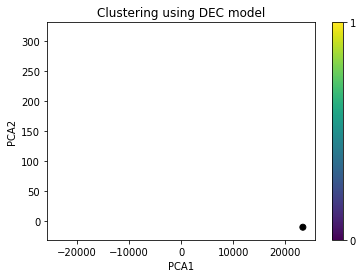

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = pd.read_csv('merge_final.csv',skiprows=1)
y = pd.read_csv('ytrue.csv')

pca = PCA(n_components=2)
x_pca = pca.fit_transform(encoder.predict(x))

colors = []
cluster_colors = {0:np.array([255,0,0]),1:np.array([0,255,0]),2:np.array([0,0,255]),3:np.array([255,255,0])}
for n in list_of_floats:
    color = np.zeros([3])
    for i in range(len(n)):
        color +=  cluster_colors[i]*n[i]

    colors.append(color)
colors = np.asarray(colors)

visx = x_pca[:, 0]
visy = x_pca[:, 1]
plot1 = plt.figure(1)
#for i in range(len(vis)):
plt.scatter(visx, visy, c=colors/255.0)
#plt.colorbar(ticks=range(256))
plt.title('Clustering using DEC model')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()



